# Árboles
Prueba del laboratorio de simple_decision_tree

Para este caso, se desea encontrar quienes de los postulantes a un trabajo tienen más posibilidades de entrar a la empresa, en base a un algoritmo de árbol de decisión, se logrará determinar de los candidatos quienes tienen características satisfactorias para conseguir el empleo, cabe mencionar que el trabajo se lo puede hacer de forma virtual.

In [1]:
#Importación de las librerías que se van a usar.
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [30]:
#Dataset: experiencia/100, Nota/20 (En una prueba).
df = pandas.read_csv('Dataset/dataset_1.csv')
print(df)

    Edad  Experiencia  Nota      Provincia Trabajo
0     23           30    18          Quito      No
1     20           19    17  Santo_Domingo      No
2     30           18    18          Quito      Si
3     22           24    18  Santo_Domingo      Si
4     57           22    18          Quito      Si
5     23           22    17          Quito      No
6     18           28    18  Santo_Domingo      No
7     25           23    17         Manab¡      Si
8     23           25    18  Santo_Domingo      Si
9     23           24    17          Quito      No
10    18           25    19         Manab¡      No
11    18           30    18          Quito      No
12    28           19    18  Santo_Domingo      Si
13    54           65    17          Quito      Si
14    30           21    19          Quito      No


In [31]:
#transformación de datos
con1 = {'Quito': 0, 'Santo_Domingo': 1, 'Manab¡': 2}
df['Provincia'] = df['Provincia'].map(con1)

con2 = {'Si' : 1, 'No' : 0}
df['Trabajo'] = df['Trabajo'].map(con2)

print(df)

    Edad  Experiencia  Nota  Provincia  Trabajo
0     23           30    18          0        0
1     20           19    17          1        0
2     30           18    18          0        1
3     22           24    18          1        1
4     57           22    18          0        1
5     23           22    17          0        0
6     18           28    18          1        0
7     25           23    17          2        1
8     23           25    18          1        1
9     23           24    17          0        0
10    18           25    19          2        0
11    18           30    18          0        0
12    28           19    18          1        1
13    54           65    17          0        1
14    30           21    19          0        0


In [41]:
#Escogiendo las características para realizar la predicción, no se escoge el campo 
#'provincia' dado que no es relevante.
caracteristicas = ['Edad', 'Nota', 'Experiencia']
x = df[caracteristicas]

#separar la columna con los valores a predecir
y = df['Trabajo']

print(x, y, sep ='\n\n')

    Edad  Nota  Experiencia
0     23    18           30
1     20    17           19
2     30    18           18
3     22    18           24
4     57    18           22
5     23    17           22
6     18    18           28
7     25    17           23
8     23    18           25
9     23    17           24
10    18    19           25
11    18    18           30
12    28    18           19
13    54    17           65
14    30    19           21

0     0
1     0
2     1
3     1
4     1
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    1
13    1
14    0
Name: Trabajo, dtype: int64


In [42]:
#Creación de un árbol de decisión

arbolde = DecisionTreeClassifier()
arbolde = arbolde.fit(x, y)

In [43]:
#guardar la decisión del árbol en una imagen
datos = tree.export_graphviz(arbolde, out_file=None, feature_names=caracteristicas)
grafico = pydotplus.graph_from_dot_data(datos)
grafico.write_png('arboldecision2.png')

True

<IPython.core.display.Javascript object>


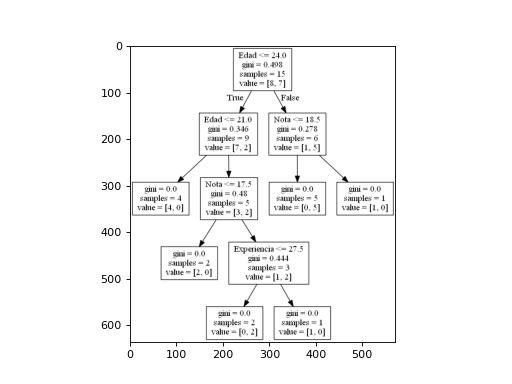

In [44]:
#muestra la imagen

img = pltimg.imread('arboldecision2.png')
imgplot = plt.imshow(img)
plt.show()